In [33]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from tensorboard.backend.event_processing import event_accumulator


log_dir = './runs/addition_run21'

event_acc = event_accumulator.EventAccumulator(log_dir)
event_acc.Reload()

# Get the scalar values
scalars = {}
for tag in event_acc.Tags()['scalars']:
    # print(tag)
    event_list = event_acc.Scalars(tag)
    scalars[tag] = [(event.step, event.value) for event in event_list]

# print(scalars)

In [37]:
tag_list = list(scalars.keys())
tag_list

['train_loss/train_loss',
 'id_test_loss/id_test_loss',
 'train_acc_dgt/train_acc_dgt',
 'id_test_acc_dgt/id_test_acc_dgt',
 'train_acc/train_acc',
 'id_test_acc/id_test_acc',
 'learning_rate',
 'model_flops_utilization']

In [38]:
scalar_dict = {}

label_dict = {'p=50': '../runs/addition_run21', 
              'p=51': '../runs/addition_run25', 
              'p=100': '../runs/addition_run22', 
              'p=101': '../runs/addition_run23',
              'p=150': '../runs/addition_run44',  # run27
              'p=151': '../runs/addition_run28',
              'p=200': '../runs/addition_run24', 
              'p=201': '../runs/addition_run26',
             }

for label in label_dict.keys():
    log_dir = label_dict[label]
    event_acc = event_accumulator.EventAccumulator(log_dir)
    event_acc.Reload()
    scalars = {}
    for tag in event_acc.Tags()['scalars']:
        # print(tag)
        event_list = event_acc.Scalars(tag)
        scalars[tag] = [(event.step, event.value) for event in event_list]
    scalar_dict[label] = scalars

/tmp/ipykernel_44386/838396780.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_44386/838396780.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(steps), value_list, linestyle='-', linewidth=2, color=color_list[i])


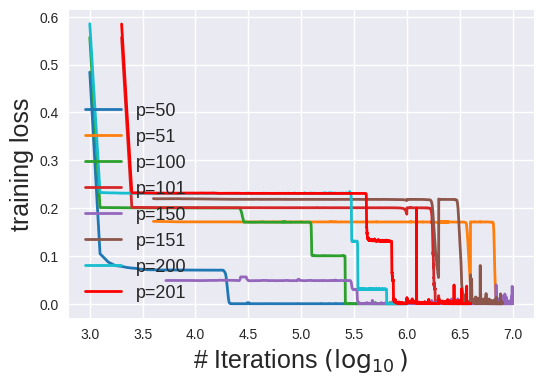

In [43]:
plt.figure(figsize=(6, 4))
plt.style.use('seaborn')

plot_list = list(label_dict.keys())

color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#17becf', '#FF0000']
# color_list = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#008000', '#00FFFF', '#0000FF', '#800080', '#FF00FF', '#FFC0CB',
#           '#800000', '#FF4500', '#FFFFE0', '#32CD32', '#40E0D0', '#0000CD', '#9932CC', '#FF1493', '#A52A2A', '#BDB76B',
#           '#8B4513', '#7B68EE', '#8A2BE2', '#3CB371', '#FF69B4', '#ADFF2F', '#87CEEB', '#228B22', '#9ACD32', '#F08080',
#           '#F0E68C', '#DDA0DD', '#48D1CC', '#4682B4', '#9F79EE', '#6A5ACD', '#87CEFA', '#20B2AA', '#3D9970', '#FF6347']

tag = 'train_loss/train_loss'
save_tag = 'training_loss_modular_addition'

for i in range(len(plot_list)):
    label = plot_list[i]
    values = [v for k, v in scalar_dict[label].items() if tag in k]
    steps, value = zip(*values[0])
    # value_list = [x for x in list(value)]
    value_list = list(pd.Series([x for x in list(value)]).rolling(window=5).mean())
    plt.plot(np.log10(steps), value_list, linestyle='-', linewidth=2, color=color_list[i])

plt.xlabel('# Iterations ' + r'$(\log_{10})$', fontsize=18)
plt.ylabel(f'training loss', fontsize=18)
# plt.ylabel(r'Accuracy of OOD (w.r.t $\tilde{f}^{*}(a,b)$)')
#plt.legend(plot_list)
plt.legend(plot_list, loc='lower left', fancybox=True, shadow=True, ncol=1, prop={'size': 13}) #  bbox_to_anchor=(0.5, -0.15), 
# plt.savefig(f'../img/{save_tag}.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [44]:
tag_list

['train_loss/train_loss',
 'id_test_loss/id_test_loss',
 'train_acc_dgt/train_acc_dgt',
 'id_test_acc_dgt/id_test_acc_dgt',
 'train_acc/train_acc',
 'id_test_acc/id_test_acc',
 'learning_rate',
 'model_flops_utilization']

/tmp/ipykernel_44386/3595821824.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_44386/3595821824.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(steps), value_list, linestyle=linestyle_list[i], linewidth=2, color=color_list[i])


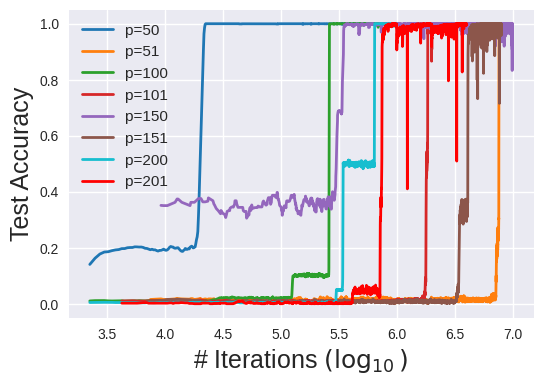

In [51]:
tag = 'id_test_acc/id_test_acc'

plt.figure(figsize=(6, 4))
plt.style.use('seaborn')

plot_list = list(label_dict.keys())

color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#17becf', '#FF0000']
linestyle_list = ['-', '-', '-', '-', '-', '-', '-', '-']

save_tag = 'in_sample_modular_addition_accuracy'
for i in range(len(plot_list)):
    label = plot_list[i]
    values = [v for k, v in scalar_dict[label].items() if tag in k]
    steps, value = zip(*values[0])
    value_list = list(pd.Series([x for x in list(value)]).rolling(window=10).mean())
    plt.plot(np.log10(steps), value_list, linestyle=linestyle_list[i], linewidth=2, color=color_list[i])

plt.xlabel('# Iterations ' + r'$(\log_{10})$', fontsize=18)
plt.ylabel(f'Test Accuracy', fontsize=18)
# plt.ylabel(r'Accuracy of OOD (w.r.t $\tilde{f}^{*}(a,b)$)')
#plt.legend(plot_list)
plt.legend(plot_list, loc='upper left', fancybox=True, shadow=True, ncol=1, prop={'size': 11})

plt.savefig(f'../img/{save_tag}.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

/tmp/ipykernel_44386/3273542922.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_44386/3273542922.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(steps), value_list, linestyle=linestyle_list[i], linewidth=2, color=color_list[i])


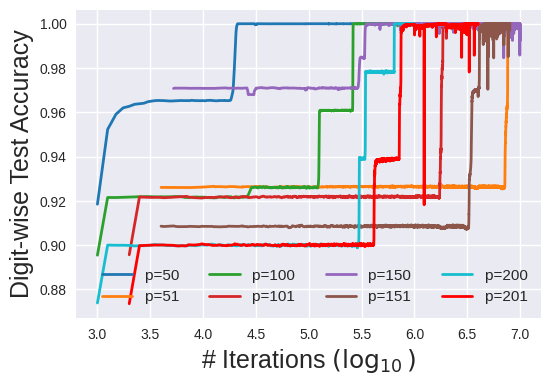

In [50]:
tag = 'id_test_acc_dgt/id_test_acc_dgt'

plt.figure(figsize=(6, 4))
plt.style.use('seaborn')

plot_list = list(label_dict.keys())

color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#17becf', '#FF0000']
linestyle_list = ['-', '-', '-', '-', '-', '-', '-', '-']

save_tag = 'in_sample_modular_addition_digit_accuracy'
for i in range(len(plot_list)):
    label = plot_list[i]
    values = [v for k, v in scalar_dict[label].items() if tag in k]
    steps, value = zip(*values[0])
    value_list = list(pd.Series([x for x in list(value)]).rolling(window=5).mean())
    plt.plot(np.log10(steps), value_list, linestyle=linestyle_list[i], linewidth=2, color=color_list[i])

plt.xlabel('# Iterations ' + r'$(\log_{10})$', fontsize=18)
plt.ylabel(f'Digit-wise Test Accuracy', fontsize=18)
# plt.ylabel(r'Accuracy of OOD (w.r.t $\tilde{f}^{*}(a,b)$)')
#plt.legend(plot_list)
plt.legend(plot_list, loc='lower right', fancybox=True, shadow=True, ncol=4, prop={'size': 11})

plt.savefig(f'../img/{save_tag}.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()